In [1]:
import requests
import json
from pprint import pprint
import pandas as pd

In [2]:
import json
from pprint import pprint
import pandas as pd

import sklearn
import statsmodels as sm

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import missingno

In [12]:
#importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [206]:
import pandas as pd



In [301]:
orig = pd.read_csv('/content/orig_submission_final.csv')
#orig

In [ ]:
orig.info(verbose=True)

In [302]:

miss = pd.read_csv('/content/miss_submission_final.csv')
#miss

In [ ]:
miss.info(verbose=True)

In [ ]:
##### Verificando os valores e colunas #####

#display(miss) # Exibe o Dataframe

#print(miss.isna().any()) # Exibe como True ou False os valores nan do Dataframe
#print(miss.isna().sum()) # Exibe a soma dos valores nan no Dataframe
#miss.head()
#miss.info(verbose=True)
#print(miss.info())
#miss.shape
#miss.isna().sum()
#miss.isnull().sum()
#type(miss)

In [303]:
### Trata a coluna que tenha numeros, mas que não estao sendo reconhecidos como valores numericos.
orig["temp"] = pd.to_numeric(orig["temp"], errors="coerce") # errors="coerce" //trata os valores que durante a conversao deram erro, deixando como vazios os espaços.

In [ ]:
orig.info(verbose=True)

In [304]:
### Trata a coluna que tenha numeros, mas que não estao sendo reconhecidos como valores numericos.
miss["temp"] = pd.to_numeric(miss["temp"], errors="coerce") # errors="coerce" //trata os valores que durante a conversao deram erro, deixando como vazios os espaços.

In [ ]:
miss.info(verbose=True)

In [ ]:
#### Tratando valores vazios
# Preenchendo com a media

media = miss["temp"].mean()
miss["temp"] = miss["temp"].fillna(media)
display(miss)

In [ ]:
#### Tratando valores vazios
# Preenchendo com valores anteriores / posteriores

miss["temp"] = miss["temp"].fillna(method="ffill") # preenche com valor anterior
miss["temp"] = miss["temp"].fillna(method="bfill") # preenche com valor posterior
display(miss)

In [ ]:
#### Tratando valores vazios
# Preenchendo com valores com interpolação

miss["temp"] = miss["temp"].interpolate()
display(miss)

In [245]:
def plot_df(orig, miss, temp, titulo=None, xlabel=None, ylabel=None):
    '''	
    df1: dataframe original (sem dados faltantes)
    df2: dataframe com dados faltantes
    col: nome da coluna que contém dados faltantes
    '''    
    df_f = miss.rename(columns={temp: 'faltante'})
    
    colunas = df_f.loc[:, 'faltante':].columns.tolist()
    subplots_t = len(colunas)
   
    fig, ax = plt.subplots(subplots_t+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = titulo 
    
    orig[temp].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Dataset Original')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, nomecol in enumerate(colunas):
        df_f[nomecol].plot(ax=ax[i+1])
        ax[i+1].set_title(nomecol)

    plt.show()

In [246]:
def indice_rmse(orig, miss, col=None):
    '''
    df1: dataframe original (sem dados faltantes)
    df2: dataframe com dados faltantes
    col: nome da coluna que contém dados faltantes

    retorna: a lista de índices
    '''
    df_f = miss.rename(columns={col: 'faltante'})
    colunas = df_f.loc[:, 'faltante':].columns.tolist()
    scores = []
    for comp_col in df_f[1:]:
        rmse = np.sqrt(np.mean((orig[col] - df_f[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE de {comp_col}: {rmse}')
    return scores

In [ ]:
miss.info(verbose=True)

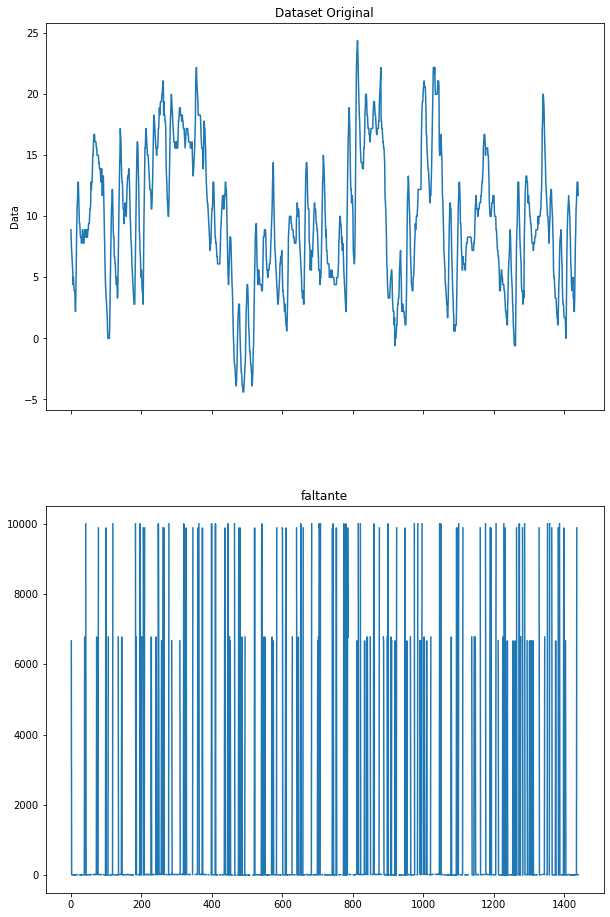

In [305]:
plot_df(orig, 
         miss, 
         'temp',
         titulo="Temperatura Diaria",
         xlabel="Dias",
         ylabel="Data")

In [ ]:
miss.info(verbose=True)

In [306]:
miss['ffill'] = miss['temp'].fillna(method='ffill')
miss['bfill'] = miss['temp'].fillna(method='bfill')
miss['mean'] = miss['temp'].fillna(miss['temp'].mean())

In [307]:
# Index(['time', 'temp', 'ffill', 'bfill', 'mean'], dtype='object')

### Trata a coluna que tenha numeros, mas que não estao sendo reconhecidos como valores numericos.

orig["temp"] = pd.to_numeric(orig["temp"], errors="coerce") # errors="coerce" //trata os valores que durante a conversao deram erro, deixando como vazios os espaço
miss["temp"] = pd.to_numeric(miss["temp"], errors="coerce") # errors="coerce" //trata os valores que durante a conversao deram erro, deixando como vazios os espaços.

In [ ]:
miss.dropna()

In [314]:
miss.isna().sum()

time       0
temp     425
ffill      1
bfill      0
mean       0
dtype: int64

In [ ]:
#Calculando o erro quadrático médio
_ = indice_rmse(orig, 
                    miss2, 
                    'temp')

In [ ]:
##### Verificando os valores e colunas #####

#display(miss) # Exibe o Dataframe

#print(miss.isna().any()) # Exibe como True ou False os valores nan do Dataframe
#print(miss.isna().sum()) # Exibe a soma dos valores nan no Dataframe
#miss.head()
#miss.info(verbose=True)
#print(miss.info())
#miss.shape
#miss.isna().sum()
#miss.isnull().sum()
#type(miss)